# Please use jupyter notebook for better understanding

NAME : YALAGONDA LOKESH

REG NO : 19BCE0081

university : VELLORE INSTITUTE OF TECHNOLOGY

    B.Tech(computer science and engineering)

# Task 6. Data Science example.
Implement a sample machine learning program for a problem statement of your choice.

# PROBLEM STATEMENT: 
    To find the best fitting model in machine learning algorithms like Logistic Regression, knn, svm, decision tree, random forest etc..

I have downloaded sample dataset from kaggle for the prediction of heart disease.
link to download the dataset : https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

# SOLLUTION FOR THE TASK

In [1]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [5]:
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [7]:
df=pd.read_csv("heart.csv")
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
# In the dataset there are no null values

In [11]:
df.duplicated().sum()

723

In [12]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()


0

In [13]:
# All the duplicate rows has been deleted from the dataset

In [14]:
# To seperate category and continuous variables
category,continuous=[],[]
for i in df.columns:
    if(len(np.unique(df[i]))<10):
        category.append(i)
    else:
        continuous.append(i)
print(f"category=",category)
print(f"continuous=",continuous)

category= ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
continuous= ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [15]:
category

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [16]:
continuous

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [17]:
newcatdf=df[category]
newcondf=df[continuous]

In [18]:
import seaborn as sns

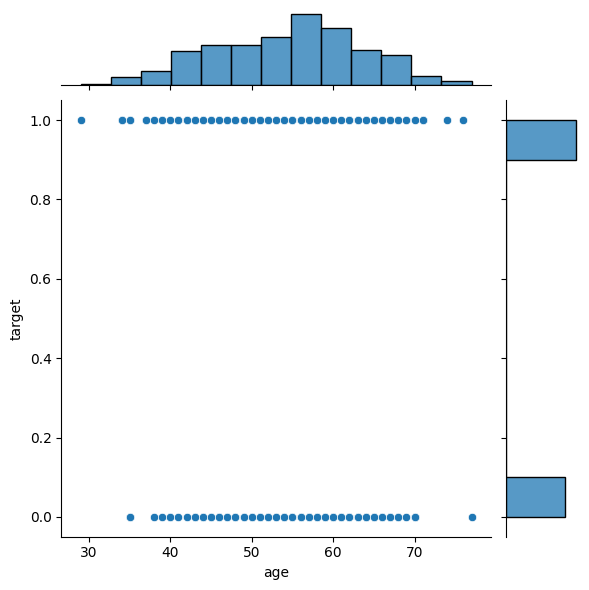

In [19]:
sns.jointplot(y='target',x='age',data=df)

<AxesSubplot: xlabel='sex', ylabel='count'>

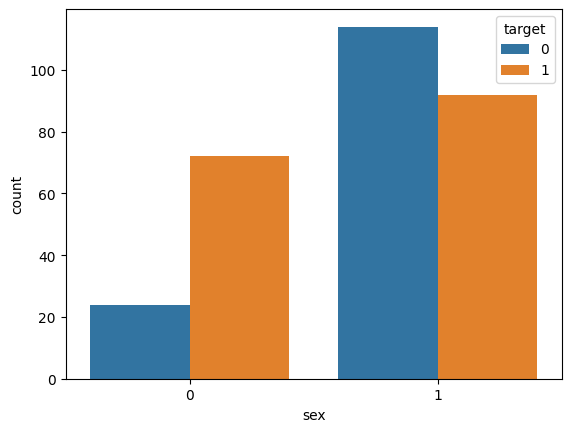

In [20]:
sns.countplot(x='sex',hue='target',data=df)

<AxesSubplot: xlabel='target', ylabel='age'>

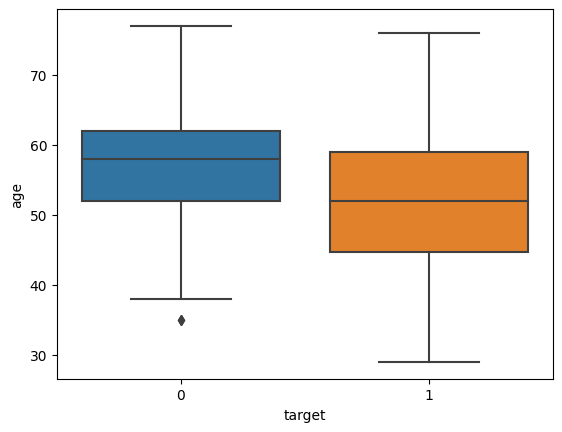

In [21]:
sns.boxplot(x='target',y='age',data=df)

<AxesSubplot: xlabel='cp', ylabel='count'>

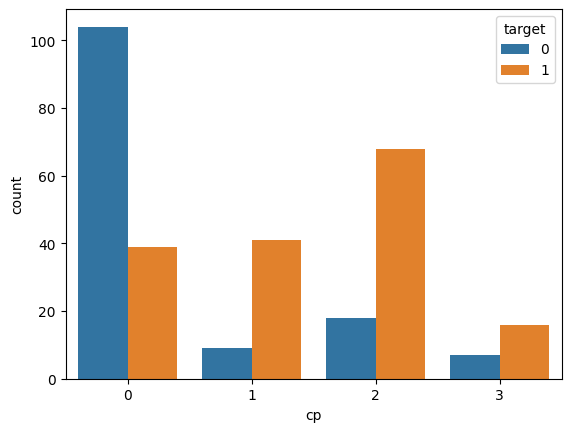

In [22]:
sns.countplot(x='cp',hue='target',data=df)

In [23]:
features=enumerate(category)

In [24]:
import matplotlib.pyplot as plt

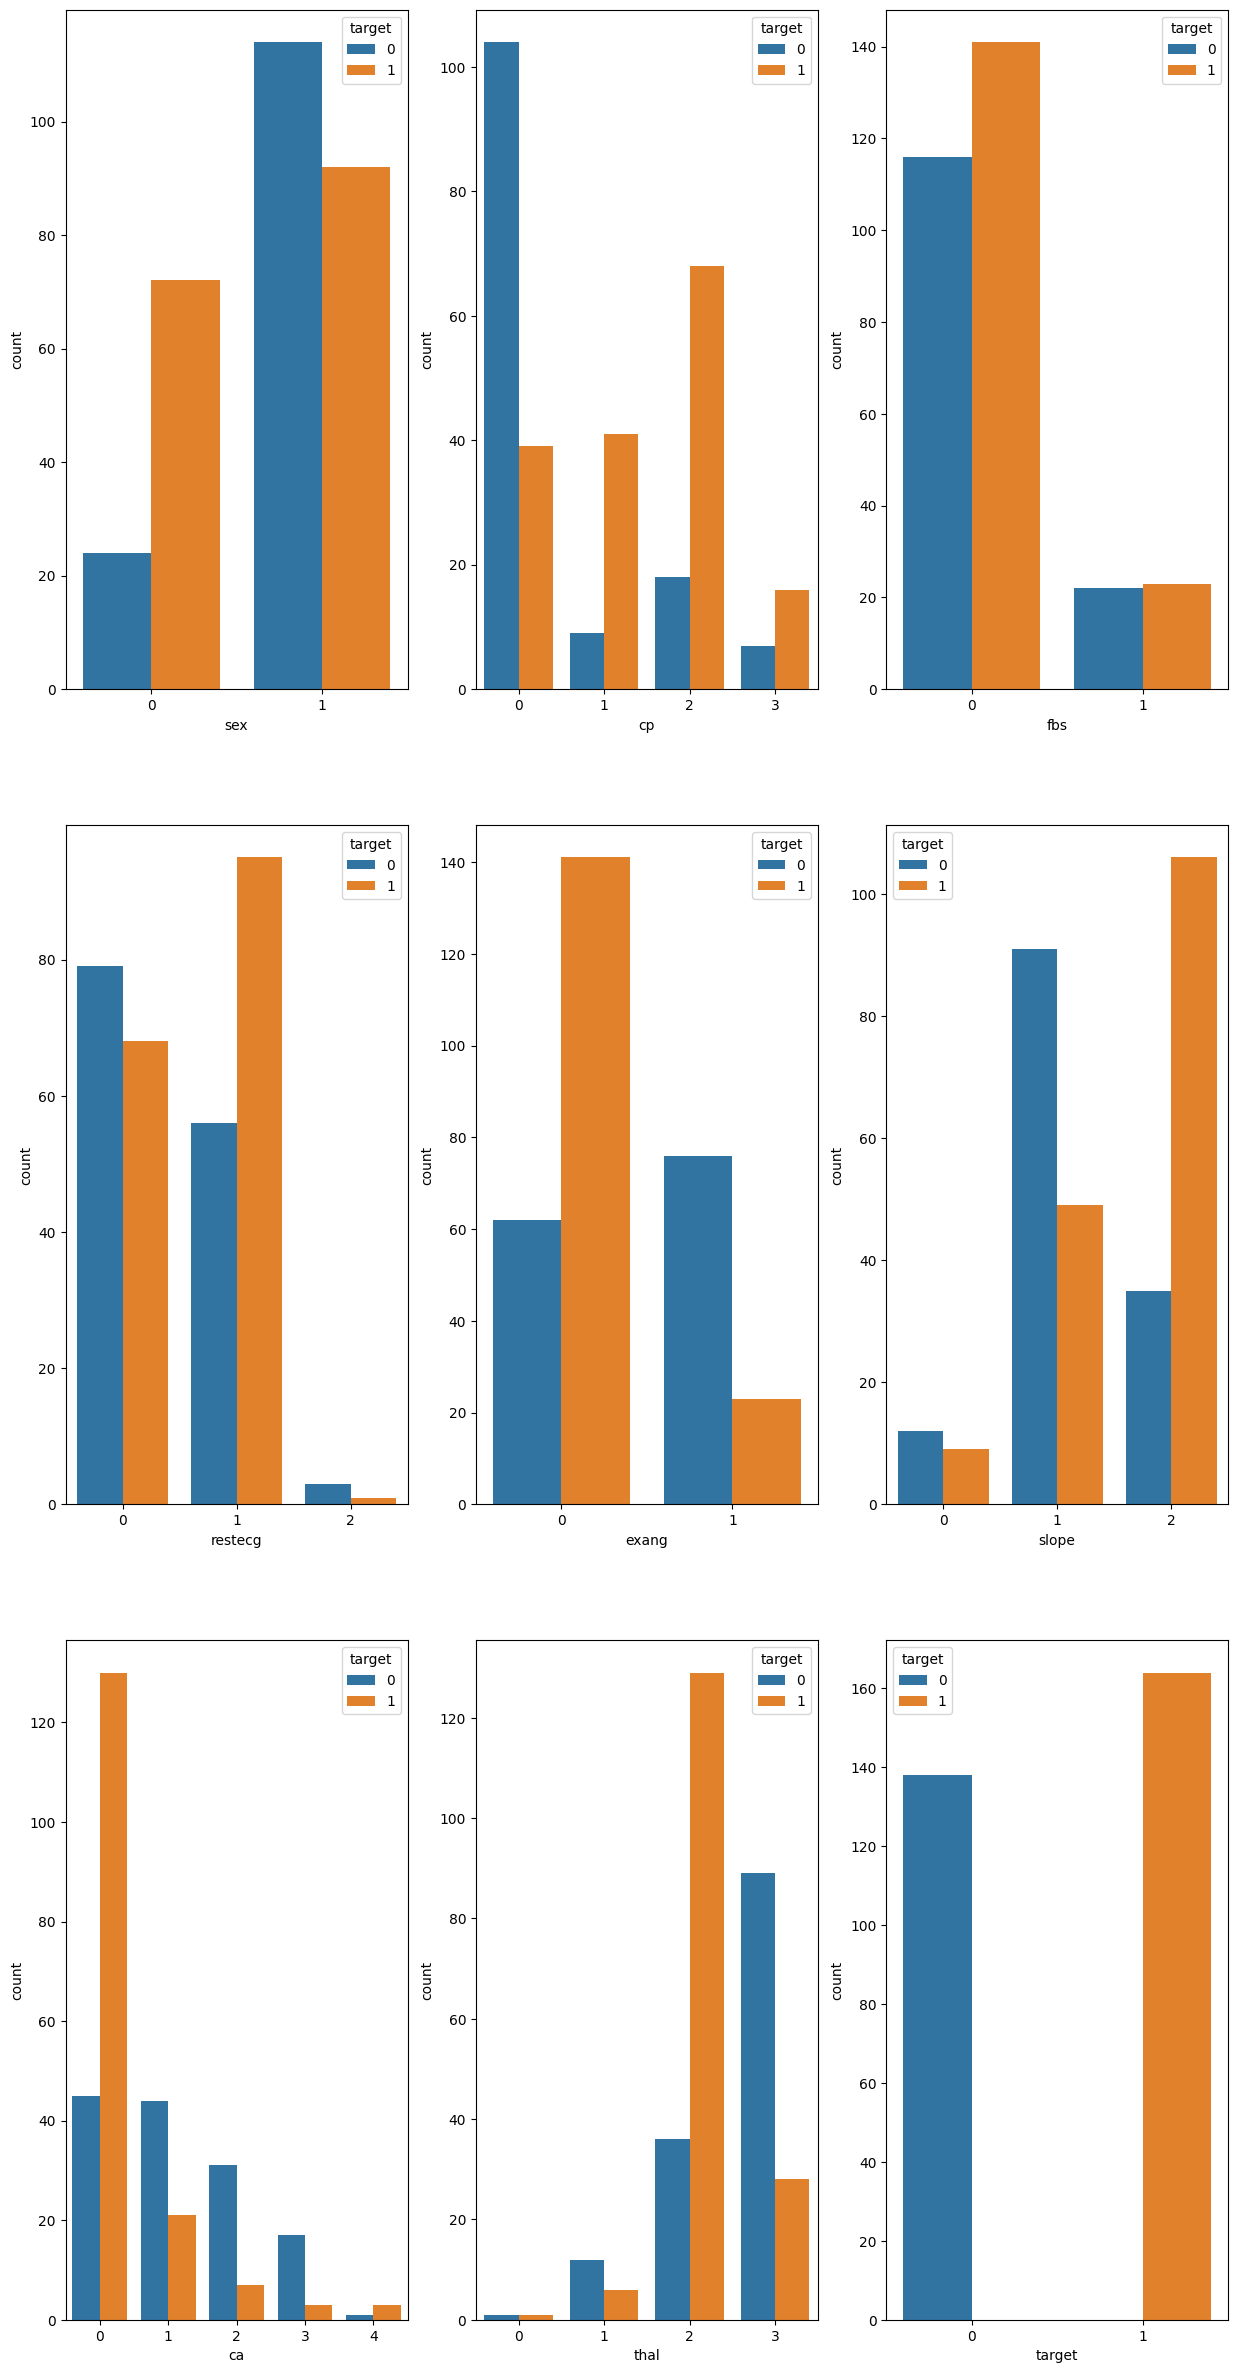

In [25]:
plt.figure(figsize=(15,30))
for i in enumerate(category):
    plt.subplot(3,3,i[0]+1)
    sns.countplot(x=i[1],hue='target',data=df)
    plt.xlabel(i[1])

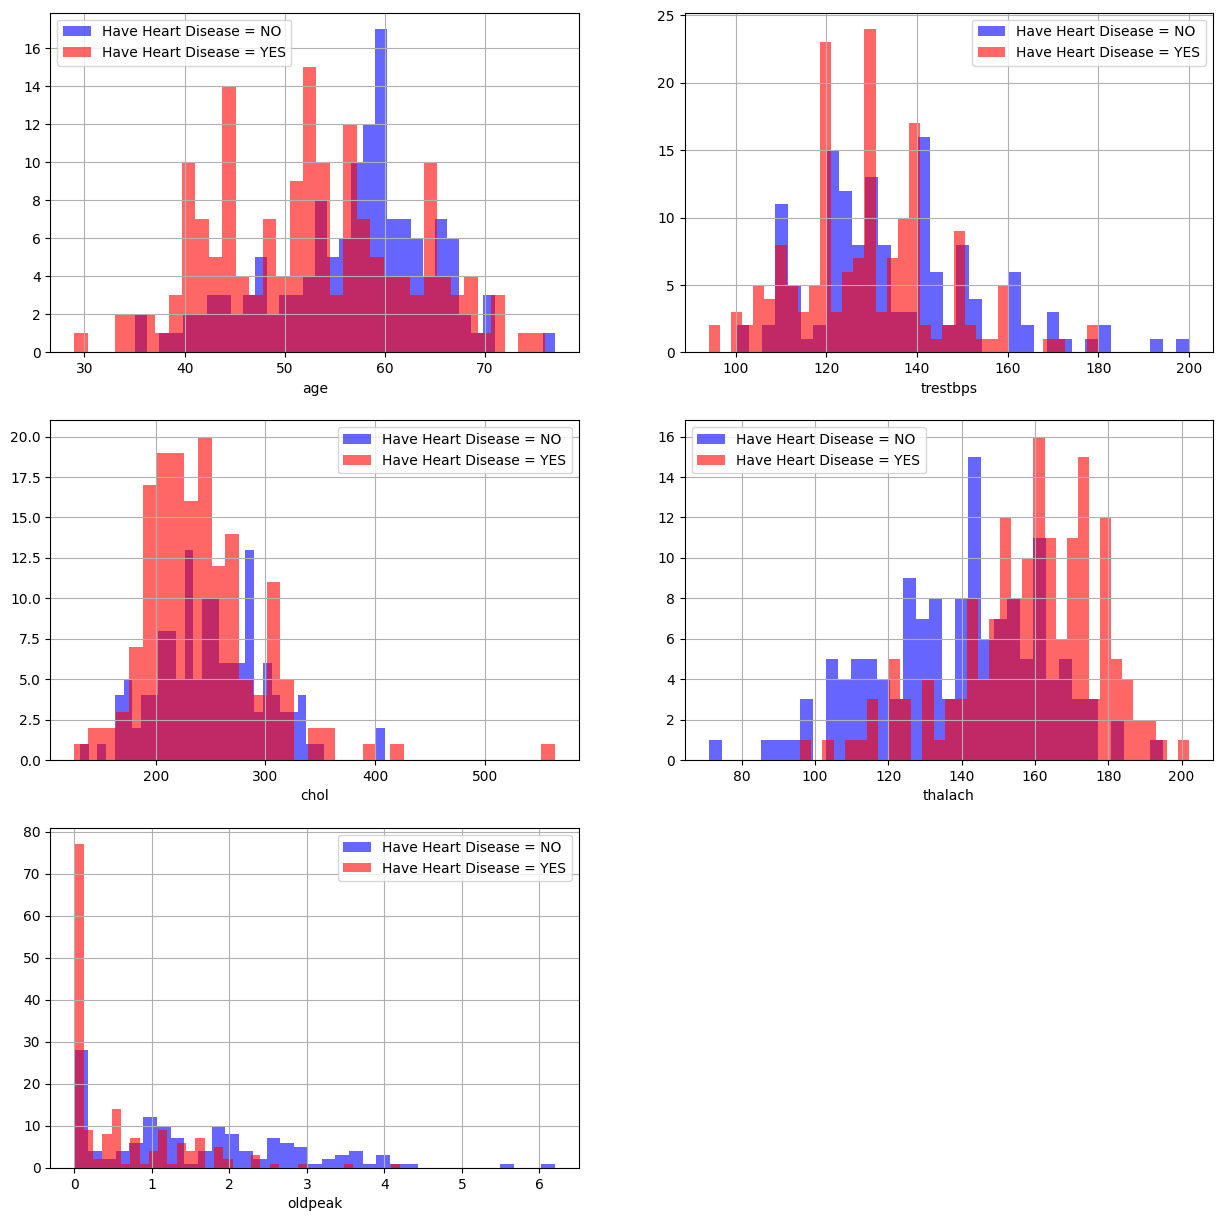

In [26]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continuous, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [27]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[col_to_scale] = s_sc.fit_transform(df[col_to_scale])

In [28]:
continuous_data=df[continuous]
continuous_data.head(5)
continuous_data['target']=df['target']
continuous_data.corr(method='pearson')

C:\Users\W10-Dell\AppData\Local\Temp\ipykernel_9048\3232985789.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continuous_data['target']=df['target']


,age,trestbps,chol,thalach,oldpeak,target
age,1.000000,0.283121,0.207216,-0.395235,0.206040,-0.221476
trestbps,0.283121,1.000000,0.125256,-0.048023,0.194600,-0.146269
chol,0.207216,0.125256,1.000000,-0.005308,0.050086,-0.081437
thalach,-0.395235,-0.048023,-0.005308,1.000000,-0.342201,0.419955
oldpeak,0.206040,0.194600,0.050086,-0.342201,1.000000,-0.429146
target,-0.221476,-0.146269,-0.081437,0.419955,-0.429146,1.000000


In [29]:
def print_score(clf, xtrain, ytrain, xtest, ytest, train=True):
    if train:
        pred = clf.predict(xtrain)
        clf_report = pd.DataFrame(classification_report(ytrain, pred, output_dict=True))
        print("Train Result:\n**********************************************************")
        print(f"Accuracy Score: {accuracy_score(ytrain, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(ytrain, pred)}\n")
        
    elif train==False:
        pred = clf.predict(xtest)
        clf_report = pd.DataFrame(classification_report(ytest, pred, output_dict=True))
        print("Test Result:\n*********************************************************")        
        print(f"Accuracy Score: {accuracy_score(ytest, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(ytest, pred)}\n")

In [30]:
x=df.drop(['target'],axis=1)
y=df['target']

In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model=LogisticRegression()

In [34]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [35]:
pred=model.predict(xtest)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(pred,ytest)

0.819672131147541

In [38]:
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(xtrain, ytrain)

print_score(log_reg, xtrain, ytrain, xtest, ytest, True)
print_score(log_reg, xtrain, ytrain, xtest, ytest ,False)

Train Result:
**********************************************************
Accuracy Score: 85.06%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.881720    0.831081  0.850622    0.856401      0.853564
recall       0.766355    0.917910  0.850622    0.842133      0.850622
f1-score     0.820000    0.872340  0.850622    0.846170      0.849102
support    107.000000  134.000000  0.850622  241.000000    241.000000
_______________________________________________
Confusion Matrix: 
 [[ 82  25]
 [ 11 123]]

Test Result:
*********************************************************
Accuracy Score: 83.61%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.920000   0.777778  0.836066   0.848889      0.850055
recall      0.741935   0.933333  0.836066   0.837634      0.836066
f1-score    0.821429   0.

In [39]:
test_score = accuracy_score(ytest, log_reg.predict(xtest)) * 100
train_score = accuracy_score(ytrain, log_reg.predict(xtrain)) * 100

results = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.062241,83.606557


In [40]:
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)

print_score(knn, xtrain, ytrain, xtest, ytest, True)
print_score(knn, xtrain, ytrain, xtest, ytest, False)

Train Result:
**********************************************************
Accuracy Score: 87.14%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.904255    0.850340  0.871369    0.877298      0.874278
recall       0.794393    0.932836  0.871369    0.863614      0.871369
f1-score     0.845771    0.889680  0.871369    0.867725      0.870185
support    107.000000  134.000000  0.871369  241.000000    241.000000
_______________________________________________
Confusion Matrix: 
 [[ 85  22]
 [  9 125]]

Test Result:
*********************************************************
Accuracy Score: 81.97%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.884615   0.771429  0.819672   0.828022      0.828950
recall      0.741935   0.900000  0.819672   0.820968      0.819672
f1-score    0.807018   0.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [41]:
test_score = accuracy_score(ytest, knn.predict(xtest)) * 100
train_score = accuracy_score(ytrain, knn.predict(xtrain)) * 100

results2 = pd.DataFrame(data=[["knn", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results=results.append(results2,ignore_index=True)
results

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.062241,83.606557
1,knn,87.136929,81.967213


In [42]:
svm = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm.fit(xtrain, ytrain)

SVC(gamma=0.1)

In [43]:
print_score(svm, xtrain, ytrain, xtest, ytest, True)
print_score(svm, xtrain, ytrain, xtest, ytest, False)

Train Result:
**********************************************************
Accuracy Score: 89.21%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.926316    0.869863  0.892116    0.898089      0.894927
recall       0.822430    0.947761  0.892116    0.885096      0.892116
f1-score     0.871287    0.907143  0.892116    0.889215      0.891224
support    107.000000  134.000000  0.892116  241.000000    241.000000
_______________________________________________
Confusion Matrix: 
 [[ 88  19]
 [  7 127]]

Test Result:
*********************************************************
Accuracy Score: 81.97%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.857143   0.787879  0.819672   0.822511      0.823079
recall      0.774194   0.866667  0.819672   0.820430      0.819672
f1-score    0.813559   0.

In [44]:
test_score = accuracy_score(ytest, svm.predict(xtest)) * 100
train_score = accuracy_score(ytrain, svm.predict(xtrain)) * 100

results3 = pd.DataFrame(data=[["svm", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results=results.append(results3,ignore_index=True)
results

C:\Users\W10-Dell\AppData\Local\Temp\ipykernel_9048\1243509828.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append(results3,ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.062241,83.606557
1,knn,87.136929,81.967213
2,svm,89.211618,81.967213


In [45]:
dt = DecisionTreeClassifier(random_state=40)
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=40)

In [46]:
print_score(dt, xtrain, ytrain, xtest, ytest, True)
print_score(dt, xtrain, ytrain, xtest, ytest, False)

Train Result:
**********************************************************
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    107.0  134.0       1.0      241.0         241.0
_______________________________________________
Confusion Matrix: 
 [[107   0]
 [  0 134]]

Test Result:
*********************************************************
Accuracy Score: 70.49%
_______________________________________________
CLASSIFICATION REPORT:
                   0     1  accuracy  macro avg  weighted avg
precision   0.709677   0.7  0.704918   0.704839      0.704918
recall      0.709677   0.7  0.704918   0.704839      0.704918
f1-score    0.709677   0.7  0.704918   0.704839      0.704918
support    31.000000  30.0  0.70

In [47]:
test_score = accuracy_score(ytest, dt.predict(xtest)) * 100
train_score = accuracy_score(ytrain, dt.predict(xtrain)) * 100

results3 = pd.DataFrame(data=[["decisiontree", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results=results.append(results3,ignore_index=True)
results

C:\Users\W10-Dell\AppData\Local\Temp\ipykernel_9048\3810147578.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append(results3,ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.062241,83.606557
1,knn,87.136929,81.967213
2,svm,89.211618,81.967213
3,decisiontree,100.000000,70.491803


In [48]:
rf = RandomForestClassifier(n_estimators=1000, random_state=40)
rf.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=1000, random_state=40)

In [49]:
print_score(rf, xtrain, ytrain, xtest, ytest, True)
print_score(rf, xtrain, ytrain, xtest, ytest, False)

Train Result:
**********************************************************
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    107.0  134.0       1.0      241.0         241.0
_______________________________________________
Confusion Matrix: 
 [[107   0]
 [  0 134]]

Test Result:
*********************************************************
Accuracy Score: 80.33%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.827586   0.781250  0.803279   0.804418      0.804798
recall      0.774194   0.833333  0.803279   0.803763      0.803279
f1-score    0.800000   0.806452  0.803279   0.803226      0.803173
support    3

In [50]:
test_score = accuracy_score(ytest, rf.predict(xtest)) * 100
train_score = accuracy_score(ytrain, rf.predict(xtrain)) * 100

results3 = pd.DataFrame(data=[["random", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results=results.append(results3,ignore_index=True)
results

C:\Users\W10-Dell\AppData\Local\Temp\ipykernel_9048\3633612785.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append(results3,ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.062241,83.606557
1,knn,87.136929,81.967213
2,svm,89.211618,81.967213
3,decisiontree,100.000000,70.491803
4,random,100.000000,80.327869


In [51]:
results[results['Testing Accuracy %'] == results['Testing Accuracy %'].max()]

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.062241,83.606557


In [52]:
import numpy as np
n = np.array([[56, 0, 0, 125, 212, 0, 1, 168, 0, 3.2, 2, 2, 2]])
pred1 = log_reg.predict(n)
pred1



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)